# Klasterovanje

Ključna razlika segmentacije, odnosno klasterovanja u odnosu na klasifikaciju (koju smo radili ranije) jeste u tome što ne postoji ciljni atribut u odnosu na koji pravimo model. Odnosno, model koji pravimo nije usmeren ka ciljnom atributi. Cilj klasterovanja je pravljenje grupa objekata gde su klijenti unutar grupe slični, a klijenti koji su u različitim grupama različiti. Zbog takve prirode kažemo da je klasterovanje učenje bez nadgledanja.

Tipični primeri klasterovanja su:
- segmentacija tržišta,
- marketing strategije,
- planiranje gradnje grada,
- osiguranje,

ali i manje poslovne primene:
- grupisanje gene u funcije,
- grupisanje tema dokumenata i slično.

Možemo reći da je cilj klasifikacije da napravi model koji će oponašati ciljni atribut, dok je cilj klasterovanja na napravi ciljni atribut. Odnosno, napravi atribut na osnovu kog će donosilac odluke donositi i sprovoditi odluke.

## Primer prodavnice

Imamo primer male prodavnice koja ima informacije o godinama klijenta i plati koju taj klijent ima. Kombinacijom ova dva, prodavnica je u stanju da bolje plasira svoje proizvode. Na primer, može da kreira kataloge koji su prikladni toj grupi klijenata i time poveća prodaju i poveća zadovoljstvo klijenata.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

Podatke ćemo u ovom slučaju napraviti sami:

In [ ]:
age = [18, 21, 22, 24, 26, 26, 27, 30, 31, 35, 39, 40, 41, 42, 44, 46, 47, 48, 49, 54]
salary = [10000, 11000, 22000, 15000, 12000, 13000, 14000, 33000, 39000, 37000, 44000, 27000, 29000, 20000, 28000, 21000, 30000, 31000, 23000, 24000]

In [ ]:
df = pd.DataFrame({'Age': age, 'Salary': salary})
df.head()

,Age,Salary
0,18,10000
1,21,11000
2,22,22000
3,24,15000
4,26,12000


Pogledaćemo podatke na raštrkanom grafiku:

Text(0, 0.5, 'Salary')

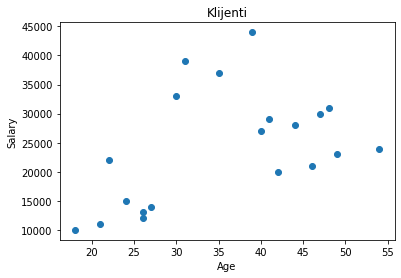

In [ ]:
plt.scatter(df['Age'], df['Salary'])
plt.title('Klijenti')

plt.xlabel('Age')
plt.ylabel('Salary')

Gledajuću podatke deluje da imamo grupe klijenata. Jedna grupa se nalazi u donjem levom uglu. To su mladi klijenti koji nemaju veliku platu. Druga grupa deluje da postoji u desnoj strani ekrana. Odnosno, to su stariji klijenti sa srednjom platom, i na kraju imamo u gornjem delu ekrana malu grupu ljudi srednje starosti sa najvećom platom.

Problem koji imamo jeste naći grupe primenom nekog algoritma.

## K-Means algoritam

Najpopularniji algoritam klasterovanja jeste K-means algoritam. Ovaj algoritam iteratorvno pronalazi grupe klijenata na osnovu sličnosti i kao rezultat daje predstavnika grupe. Od nas se očekuje da kažemo koliko grupa želimo da dobijemo. To se prosleđuje kroz parametar `n_clusters`.

Naravno, algoritam se nalazi u `sklearn` paketu i možemo ga napraviti:

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

K-Means algoritam radi po istom principu kao i svi ostali algoritmi mašinskog učenja u sklearn paketu. Postoji metoda `fit` kojom se uči model, a potom se model primenjuje metodom `predict`.

In [ ]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Razlika u odnosu na metodu `fit` kod klasifikacionih problema jeste što prosleđujemo samo jedan parametar (podatke, ili `X` u klasifikacionim problemima) baš zato što ne postoji `y` na osnovu kog bi naučili grupisanja.

Kao rezultat dobili smo predstavnike klastera ili *centroide*.

In [ ]:
model.cluster_centers_

array([[4.20909091e+01, 2.61818182e+04],
       [2.36666667e+01, 1.25000000e+04],
       [3.50000000e+01, 4.00000000e+04]])

Dakle, imamo tri reda sa dve kolone. Redovi predstavljaju predstavnike, a kolone predstavljaju atribute na osnovu kojih se vrši rezonovanje (u ovom primeru starost i plata).

Samo zbog prikaza pretvorićemo centroide u DataFrame.

In [ ]:
pd.DataFrame(model.cluster_centers_, columns=df.columns)

,Age,Salary
0,42.090909,26181.818182
1,23.666667,12500.000000
2,35.000000,40000.000000


Dakle, prvu grupu klijenata karakterišu ljudi koji imaju oko 33-34 godine i imaju platu od 38.250 evra. Druga grupa su mladi ljudi od 23-24 godine koji verovatno žive od neke stipendije od 12.500 evra godišnje. Na kraju imamo ljude od 43 godine koji imaju 25.500 evra godišne.

Te informacije možemo da upišemo u naš početni skup podataka. Drugim rečima, napravićemo novu kolonu koja će predstavljati koji klijent pripada kojem klasteru.

In [ ]:
df['Cluster'] = model.predict(df)

df.head()

,Age,Salary,Cluster
0,18,10000,1
1,21,11000,1
2,22,22000,0
3,24,15000,1
4,26,12000,1


Možemo i da proverimo šta predstavlja centroid. On je tipičan predstavnik grupe. Tipičan znači da on predstavlja prosečnog korisnika.

Dakle, ukoliko izračunamo prosečne vrednosti po grupi trebalo bi da dobijemo iste vrednosti. 

In [ ]:
df.groupby('Cluster').agg('mean')

,Age,Salary
Cluster,,
0,42.090909,26181.818182
1,23.666667,12500.000000
2,35.000000,40000.000000


In [ ]:
pd.DataFrame(model.cluster_centers_, columns=['Age', 'Salary'])

,Age,Salary
0,42.090909,26181.818182
1,23.666667,12500.000000
2,35.000000,40000.000000


Vrednosti su identične, što znači da prosečne vrednosti karakterišu centroid.

Možemo vizuelno predstaviti i podatke i centroide.

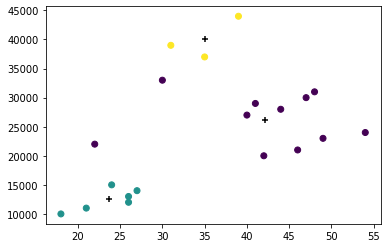

In [ ]:
plt.scatter(df['Age'], df['Salary'], c=df['Cluster'])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='+', c='black')

Zelenom, crnom i žutom bojom su predstavljeni klijenti, a znakom plus centoridi. Šest klijenata u donjem levom uglu stvarno deluju kao grupa, četiri crna klijenta takođe, i devet žutim klijenata deluju kao grupa, ali imaju jednog člana koji se nalazi skroz levo na slici. Nešto se dogodilo što je dovelo da grupisanje nije najbolje.

Razlog su opsezi vrednosti. Naime starost klijenta se meri u godinama koje su u ovom primeru između 18 i 55, a plata je drastično veća i iznosi od 10.000 do 45.000. Kada se računa sličnost klijenta logično je da će se klijenti razlikovati samo po plati (za procentualno istu razliku, apsolutna razlika je mnogo veća po plati). Zbog toga je neophodno normlizovati podatke pre sprovođenja klasterovanja.

U sklearn-u postoji veći broj metoda normalizacije podataka koja svaka ima svoje osobine, ali sve su napravljene sa ciljem da svedu podatke na istu skalu. Primenićemo jednu od njih.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df_norm = df[['Age', 'Salary']]

scaler.fit(df_norm)

MinMaxScaler(copy=True, feature_range=(0, 1))

Postupak skaliranja je takođe identičan kao i druge metode. Sa metodom `fit` se uči model skaliranja, ali se metodom `transform` podaci transofrmišu. Pošto se često želi primeniti istovremeno i učenje i primena postoji funkcija `fit_transform`.

In [ ]:
df_norm = scaler.transform(df_norm)

df_norm

array([[0.        , 0.        ],
       [0.08333333, 0.02941176],
       [0.11111111, 0.35294118],
       [0.16666667, 0.14705882],
       [0.22222222, 0.05882353],
       [0.22222222, 0.08823529],
       [0.25      , 0.11764706],
       [0.33333333, 0.67647059],
       [0.36111111, 0.85294118],
       [0.47222222, 0.79411765],
       [0.58333333, 1.        ],
       [0.61111111, 0.5       ],
       [0.63888889, 0.55882353],
       [0.66666667, 0.29411765],
       [0.72222222, 0.52941176],
       [0.77777778, 0.32352941],
       [0.80555556, 0.58823529],
       [0.83333333, 0.61764706],
       [0.86111111, 0.38235294],
       [1.        , 0.41176471]])

"Nedostatak" primene ovih metoda jeste što ne vraćaju DataFrame, već niz nizova podataka. Zbog toga moramo biti malo pažljiviji, ali svi algoritmi primaju umesto DataFrame-a i niz nizova, pa će proces i dalje raditi ukoliko prosledite podatke nakon normalizacije.

Napravićemo skup podataka u DataFrame objektu.

In [ ]:
df_norm = pd.DataFrame(df_norm, columns=['Age', 'Salary'])
df_norm.head()

,Age,Salary
0,0.000000,0.000000
1,0.083333,0.029412
2,0.111111,0.352941
3,0.166667,0.147059
4,0.222222,0.058824


Sada ćemo proslediti ovakve podatke K-Means algoritmu kako bismo videli rezultate.

In [ ]:
model = KMeans(n_clusters=3)

model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Dobijamo centroide:

In [ ]:
model.cluster_centers_

array([[0.15079365, 0.11344538, 1.        ],
       [0.76851852, 0.46732026, 0.        ],
       [0.4375    , 0.83088235, 2.        ]])

Centroide su sada takođe na drugoj skali. Odnosno, sada su vrednosti centroida između nula i jedan. To se dogodilo zbog normalizacije i otežava nam tumačenje centroida. Pokazaćemo malo kasnije šta možemo da uradimo.

In [ ]:
df_norm['Cluster'] = model.predict(df_norm)

In [ ]:
df_norm.head()

,Age,Salary,Cluster
0,0.000000,0.000000,1
1,0.083333,0.029412,1
2,0.111111,0.352941,1
3,0.166667,0.147059,1
4,0.222222,0.058824,1


Grafički možemo da pokažemo:

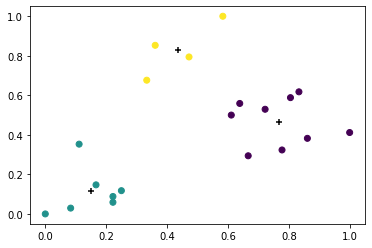

In [ ]:
plt.scatter(df_norm['Age'], df_norm['Salary'], c=df_norm['Cluster'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='+', c='black')

Sada grupisanje klijenata deluje odlično. Odnosno, svaki klijent deluje da pripada onoj grupi gde bi i trebalo da pripadne.

Možemo "korigovati" podatke i centroide. Drugim rečima, želimo da ih vratimo u vrednosti pre normalizacije pa da ih prikažemo takve kakve su.

In [ ]:
df_inv_norm = scaler.inverse_transform(df_norm[['Age', 'Salary']])
print(model.cluster_centers_)
centroids = scaler.inverse_transform(model.cluster_centers_[:,:2])

[[0.15079365 0.11344538 1.        ]
 [0.76851852 0.46732026 0.        ]
 [0.4375     0.83088235 2.        ]]


In [ ]:
centroids

array([[1.8e+01, 1.0e+04],
       [2.1e+01, 1.1e+04],
       [2.2e+01, 2.2e+04],
       [2.4e+01, 1.5e+04],
       [2.6e+01, 1.2e+04],
       [2.6e+01, 1.3e+04],
       [2.7e+01, 1.4e+04],
       [3.0e+01, 3.3e+04],
       [3.1e+01, 3.9e+04],
       [3.5e+01, 3.7e+04],
       [3.9e+01, 4.4e+04],
       [4.0e+01, 2.7e+04],
       [4.1e+01, 2.9e+04],
       [4.2e+01, 2.0e+04],
       [4.4e+01, 2.8e+04],
       [4.6e+01, 2.1e+04],
       [4.7e+01, 3.0e+04],
       [4.8e+01, 3.1e+04],
       [4.9e+01, 2.3e+04],
       [5.4e+01, 2.4e+04]])

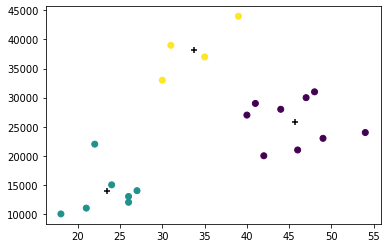

In [ ]:
plt.scatter(df_inv_norm[:, 0], df_inv_norm[:, 1], c=df_norm['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', c='black')

## Izuzetci

Izuzetci predstavljaju slučajeve koji sadrže neočekivano niske ili neočekivano visoke vrednosti po jednom ili više atributa. Algoritmi klasterovanja, a posebno K-Means algoritam su veoma osetljivi na prisustvo izuzetaka. Drugim rečima, u prisustvu izuzetaka K-Means algoritam ne radi toliko dobro.

Zbog toga postupak otkrivanja i otklanjanja izuzetaka mora da se sprovede pre pravljenja klaster modela.

Dodaćemo jedan slučaj koji ima neočekivane vrednosti kako bismo pokazali uticaj izuzetaka.

In [ ]:
df_outlier = df.append({'Age': 20, 'Salary': 80000}, ignore_index=True)

In [ ]:
df_outlier = df_outlier[['Age', 'Salary']]
df_outlier.head()

,Age,Salary
0,0.000000,0.000000
1,0.083333,0.014286
2,0.111111,0.171429
3,0.166667,0.071429
4,0.222222,0.028571


In [ ]:
df_outlier = scaler.fit_transform(df_outlier)
df_outlier = pd.DataFrame(df_outlier, columns=['Age', 'Salary'])

Prikazaćemo izuzetak:

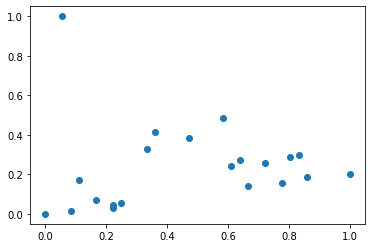

In [ ]:
plt.scatter(df_outlier['Age'], df_outlier['Salary'])

Sada, kada naučimo klaster model dobijamo interesantne rezultate.

In [ ]:
model = KMeans(n_clusters=3)

model.fit(df_outlier)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_outlier['Cluster'] = model.predict(df_outlier)

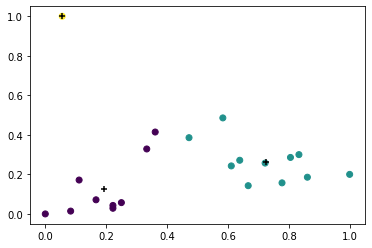

In [ ]:
plt.scatter(df_outlier['Age'], df_outlier['Salary'], c=df_outlier['Cluster'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', marker='+')

Možemo primetiti da je centroid baš ovaj izuzetak. Ovo će se gotovo uvek dešavati. Baš zbog toga treba da eliminišemo izuzetke.

## Z skor

Jedan od načina za eliminaciju izuzetaka jeste korišćenje Z skora. Z skor predstavlja standardizaciju podataka na prosečnu vrednost 0 i standardnu devijaciju 1. Ukoliko se desi da nakon standardizacije podataka dobijemo vrednost preko 3 ili ispod -3 to je prilično dobar signal da je vrednost izuzetak. To se može protumačiti da je vrednost 3 puta veća ili tri puta manja od prosečne udaljenosti od proseka i takvi slučajevi treba da budu veoma retki (odnosno da ne postoje).

To možemo dobiti preko biblioteke `scipy` i paketa `stats`.

In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(df_outlier))
z

array([[1.5474957 , 1.10939389, 1.07588766],
       [1.27052914, 1.04339595, 1.07588766],
       [1.17820695, 0.31741865, 1.07588766],
       [0.99356258, 0.7794042 , 1.07588766],
       [0.80891821, 0.97739801, 1.07588766],
       [0.80891821, 0.91140008, 1.07588766],
       [0.71659602, 0.84540214, 1.07588766],
       [0.43962946, 0.40855866, 1.07588766],
       [0.34730727, 0.80454627, 1.07588766],
       [0.02198147, 0.6725504 , 0.66208471],
       [0.39127022, 1.13453596, 0.66208471],
       [0.48359241, 0.01257104, 0.66208471],
       [0.57591459, 0.14456691, 0.66208471],
       [0.66823678, 0.44941452, 0.66208471],
       [0.85288115, 0.07856897, 0.66208471],
       [1.03752553, 0.38341658, 0.66208471],
       [1.12984771, 0.21056485, 0.66208471],
       [1.2221699 , 0.27656278, 0.66208471],
       [1.31449209, 0.25142071, 0.66208471],
       [1.77610302, 0.18542277, 0.66208471],
       [1.36285133, 3.51046167, 2.40005708]])

Primetićemo da su apsolutne vrednosti normalne izuzev poslednjeg slučaja gde je za drugu kolonu (`Salary`) vrednost 3.5. Te vrednosti treba izbaciti.

In [ ]:
np.where(z > 3)

(array([20]), array([1]))

In [ ]:
df_outlier = df_outlier.loc[(z < 3).all(axis=1), :]
df_outlier.head()

,Age,Salary,Cluster
0,0.000000,0.000000,0
1,0.083333,0.014286,0
2,0.111111,0.171429,0
3,0.166667,0.071429,0
4,0.222222,0.028571,0


# Redukcija dimenzionalnosti

Tri najšća algoritma koja se koriste za redukciju dimenzionalnosti su:

1. Principal Component Analysis - linearni model, nenadgledano učenje
2. Linear Discriminative Analysis - linearni model, nadgledano učenje
3. t-distributed Stochastic Neighbour Embedding - nelinearni model, probablistički model služi i za vizualizaciju podataka

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [13]:
!ls

'Colab Notebooks'   Dataset  'Mining of massive datasets.gdoc'


In [16]:
import pandas as pd
data = pd.read_csv('Dataset/mnist.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# save the labels to a Pandas series target
target = data['label']
# Drop the label feature
train = data.drop("label",axis=1)
train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
import numpy as np
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
print(cum_var_exp)

[  6.19682546  10.44057142  14.48502419  17.7156142   20.47068676
  22.87981161  24.92510242  26.80825712  28.47910807  29.99663281
  31.46871637  32.77964844  34.03482945  35.2289983   36.37392367
  37.46889262  38.50072636  39.49476255  40.44136987  41.35291744
  42.24240087  43.1080901   43.95520029  44.77683479  45.56332424
  46.33372625  47.09033095  47.82344767  48.53226379  49.21573322
  49.88434501  50.53854026  51.18566664  51.80769636  52.41184166
  53.00373307  53.58582308  54.15902916  54.72466252  55.2773409
  55.82851691  56.3765786   56.91048769  57.43011517  57.94261998
  58.44184065  58.9398242   59.42897618  59.90774604  60.37668085
  60.83714009  61.29128791  61.73713678  62.1772132   62.61121732
  63.03485758  63.45443664  63.86870881  64.28031718  64.68594277
  65.08659602  65.47312653  65.85437351  66.22974305  66.59619166
  66.95728459  67.31423373  67.66451985  68.01147696  68.35565467
  68.69131912  69.02517924  69.35539066  69.68214693  70.0060799
  70.3248331

In [33]:
from sklearn.decomposition import PCA
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

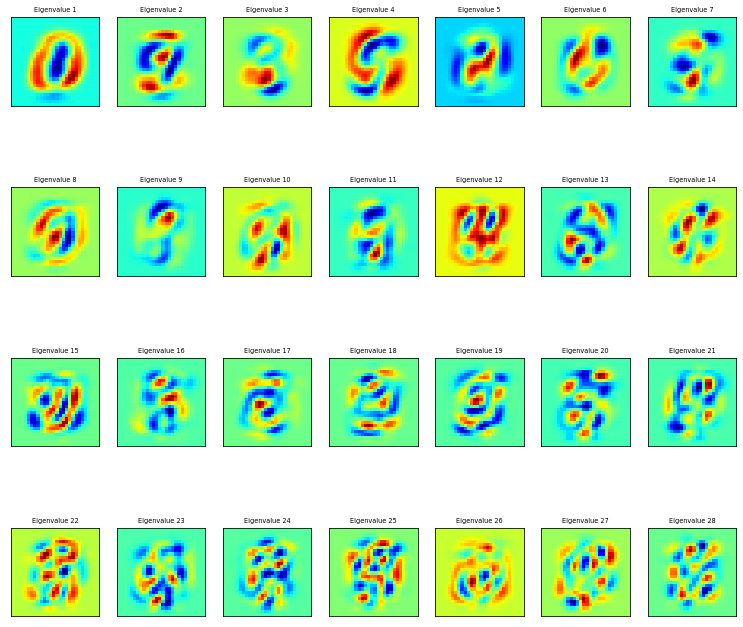

In [34]:
import matplotlib.pyplot as plt
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

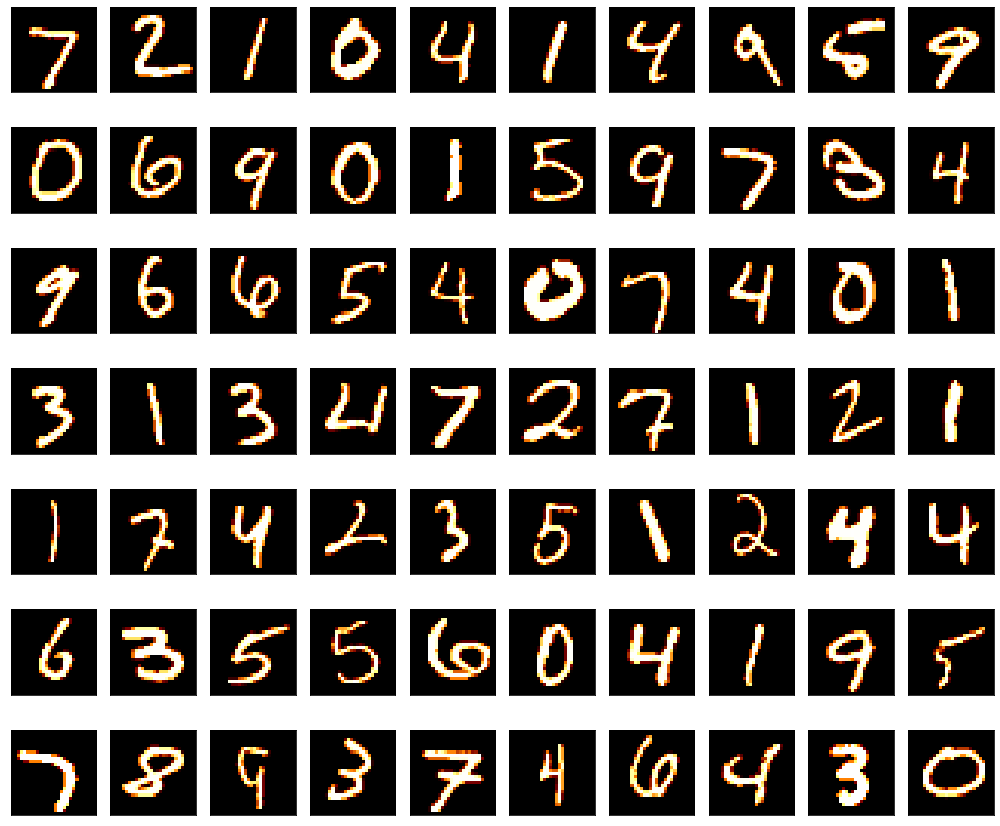

In [38]:
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [58]:
# Taking only the first N rows to speed things up
X= train[:200].values
y= target[:200].values
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

print(pca.explained_variance_)

[41.63482616 30.50769019 25.52592329 21.72131693 20.15063535]


In [51]:
print(X_embedded)

[[-1.09141064e+01 -1.58421898e+00]
 [ 3.87676883e+00  8.67959917e-01]
 [-7.19014311e+00  6.70399046e+00]
 [ 1.29840822e+01  4.28658676e+00]
 [-1.17299473e+00 -1.16041822e+01]
 [-8.22474480e+00  6.50224257e+00]
 [-2.82476592e+00 -2.07414913e+00]
 [-5.92173386e+00 -8.22435093e+00]
 [ 1.66283369e+00 -1.30816889e+01]
 [-1.33035746e+01  5.49111223e+00]
 [ 1.20534620e+01  8.61430454e+00]
 [ 1.29767818e+01 -6.49661064e+00]
 [ 2.68237323e-01 -3.56509352e+00]
 [ 1.23847828e+01  6.00232887e+00]
 [-4.11977053e+00  4.15045834e+00]
 [ 3.49888992e+00  1.30397215e+01]
 [-1.59045768e+00 -1.03756237e+01]
 [-1.10256052e+01 -1.68356252e+00]
 [ 9.38441455e-01  1.59216223e+01]
 [-2.10013556e+00 -6.31757212e+00]
 [-1.27268934e+01  5.70408583e+00]
 [ 8.09846210e+00 -1.81152213e+00]
 [ 1.19025288e+01 -7.10406685e+00]
 [ 3.95472240e+00  4.98149109e+00]
 [-2.70626378e+00 -7.67941046e+00]
 [ 1.36494217e+01  8.79167938e+00]
 [-6.49218273e+00 -4.98453093e+00]
 [-2.37465167e+00 -1.14321795e+01]
 [ 1.18675871e+01  4

In [61]:
from sklearn.manifold import TSNE
import seaborn as sns

X_embedded = TSNE(n_components=2).fit_transform(X)
print(X_embedded)
print(X_embedded.shape, y.shape)

[[-13.076821   -10.791889  ]
 [ 11.660565     3.8824136 ]
 [ -0.33404458   7.6787376 ]
 [ 10.429802   -10.646398  ]
 [-13.271434    -3.244557  ]
 [ -0.528552     8.667122  ]
 [-12.694999     3.5047812 ]
 [ -4.4601455   -3.8654795 ]
 [-16.836176    -4.8313766 ]
 [ -5.329787    12.105248  ]
 [ 15.11801    -10.377275  ]
 [ -0.27706856  -2.1144817 ]
 [ -8.775602     2.0669055 ]
 [ 12.664815   -11.995914  ]
 [  3.598666     5.4949884 ]
 [ 13.372137    -5.0767527 ]
 [-12.040387    -3.4631271 ]
 [-12.930144   -10.863908  ]
 [ 16.169794    -1.3790381 ]
 [ -8.194889    -1.3437455 ]
 [ -4.7503405   11.687856  ]
 [  3.045714   -14.734369  ]
 [ -1.4618843   -1.3354123 ]
 [  5.110617    -6.5777745 ]
 [ -6.964636    -3.129879  ]
 [ 16.10373    -11.898493  ]
 [-10.759059    -6.273882  ]
 [-12.407711    -1.9463867 ]
 [ 11.139393   -11.984022  ]
 [  3.5138972    2.7621984 ]
 [  7.2023444    0.54381514]
 [  1.586589     2.1266975 ]
 [  7.024551    -2.1780412 ]
 [  7.6920967   10.981071  ]
 [ -8.695036  

           1          2  target
0 -13.076821 -10.791889     7.0
1  11.660565   3.882414     2.0
2  -0.334045   7.678738     1.0
3  10.429802 -10.646398     0.0
4 -13.271434  -3.244557     4.0


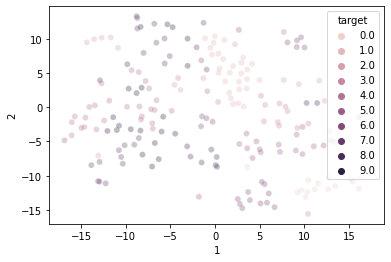

In [75]:
import pandas as pd

X = np.hstack((X_embedded,y.reshape(-1,1)))
df = pd.DataFrame(data = X, columns = ["1","2","target"])
print(df.head())
sns.scatterplot(data = df, x= "1", y="2",	 hue = "target",
    legend="full",
    alpha=0.3)